In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import model_banana_2D
import numpy as np

from lsmcmc import algorithms, logging, output, sampling, storage

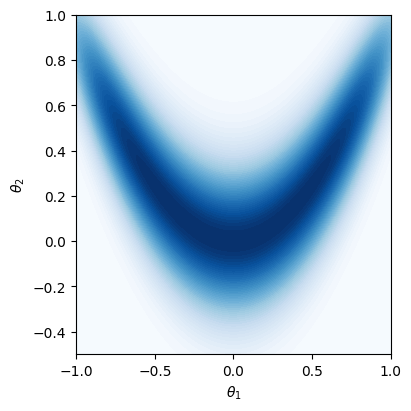

In [4]:
x_value = np.linspace(-1, 1, 1000)
y_value = np.linspace(-0.5, 1, 1000)
x_value, y_value = np.meshgrid(x_value, y_value)
density = model_banana_2D.evaluate_density(x_value, y_value)
model_banana_2D.plot_density(x_value, y_value, density)

In [5]:
acceptance_rate_output = output.MCMCOutput(
    output.AcceptanceQoI(),
    output.RunningMeanStatistic(),
    f"{'Accept Rate':<12}",
    "<+12.3e",
    log=True,
)
c0_output = output.MCMCOutput(
    output.ComponentQoI(0), output.IdentityStatistic(), f"{'Component 0':<12}", "<+12.3e", log=True
)
running_mean_c0_output = output.MCMCOutput(
    output.ComponentQoI(0),
    output.RunningMeanStatistic(),
    f"{'Run_mean_C0':<12}",
    "<+12.3e",
    log=True,
)
batch_mean_c0_output = output.MCMCOutput(
    output.ComponentQoI(0),
    output.BatchMeanStatistic(1000),
    f"{'Batch_mean_C0':<14}",
    "<+14.3e",
    log=True,
)
outputs = (acceptance_rate_output, c0_output, running_mean_c0_output, batch_mean_c0_output)

In [6]:
logger_settings = logging.LoggerSettings(
    do_printing=True,
    logfile_path=Path("logfile.log"),
    write_mode="w",
)
algorithm_settings = algorithms.AlgorithmSettings(
    step_width=0.4,
    proposal_rng=np.random.default_rng(seed=0),
    accept_reject_rng=np.random.default_rng(seed=1),
)
sampler_settings = sampling.SamplerRunSettings(
    num_samples=10000,
    initial_state=np.array([-0.5, 0.2]),
    print_interval=1000,
    store_interval=1,
)

sample_storage = storage.NumpyStorage()
posterior_model = model_banana_2D.BananaModel()
logger = logging.MCMCLogger(logger_settings)
algorithm = algorithms.pCNAlgorithm(algorithm_settings, posterior_model)
sampler = sampling.Sampler(algorithm, sample_storage, outputs, logger)
samples, outputs = sampler.run(sampler_settings)

| Iteration   | Time        | Accept Rate | Component 0 | Run_mean_C0 | Batch_mean_C0 | 
---------------------------------------------------------------------------------------
| 0.000e+00   | 2.027e-03   | +1.000e+00  | -5.000e-01  | -5.000e-01  | +0.000e+00    | 
| 1.000e+03   | 6.395e-02   | +4.146e-01  | +9.591e-01  | +3.425e-02  | +3.332e-02    | 
| 2.000e+03   | 1.167e-01   | +4.128e-01  | +6.804e-02  | +4.202e-02  | +5.069e-02    | 
| 3.000e+03   | 1.552e-01   | +4.085e-01  | +4.304e-01  | +9.365e-02  | +1.966e-01    | 
| 4.000e+03   | 1.751e-01   | +4.061e-01  | +8.364e-01  | +1.081e-01  | +1.512e-01    | 
| 5.000e+03   | 1.969e-01   | +4.117e-01  | -7.246e-01  | +1.009e-01  | +7.333e-02    | 
| 6.000e+03   | 2.197e-01   | +4.144e-01  | -6.895e-01  | +8.588e-02  | +1.094e-02    | 
| 7.000e+03   | 2.409e-01   | +4.152e-01  | +5.733e-03  | +8.621e-02  | +8.746e-02    | 
| 8.000e+03   | 2.633e-01   | +4.182e-01  | +5.696e-01  | +8.206e-02  | +5.248e-02    | 
| 9.000e+03   | 2.860e

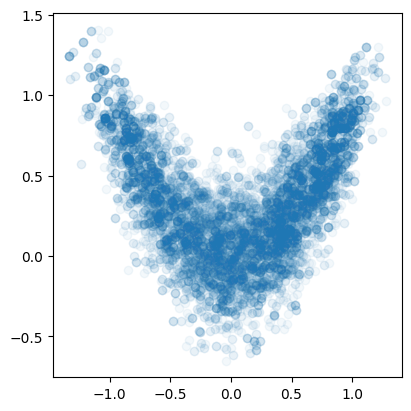

In [7]:
_, ax = plt.subplots(figsize=(4, 4), layout="constrained")
ax.scatter(samples.values[0, :], samples.values[1, :], alpha=0.05)